# 1️⃣ Data Loading & Basic Exploration

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/metadata.csv', low_memory=False)

# Quick overview
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum().sort_values(ascending=False).head(10))
df.head()


Shape: (1056660, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


# 2️⃣ Data Cleaning & Preparation

In [4]:
# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year

# Example of filling/removing
# Drop rows without title or year
df_clean = df.dropna(subset=['title','year'])

# Optional: abstract word count
df_clean['abstract_word_count'] = df_clean['abstract'].fillna('').apply(lambda x: len(x.split()))


C:\Users\HP\AppData\Local\Temp\ipykernel_56436\2062687050.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['abstract_word_count'] = df_clean['abstract'].fillna('').apply(lambda x: len(x.split()))


# 3️⃣ Data Analysis & Visualization

## a) Papers by Year

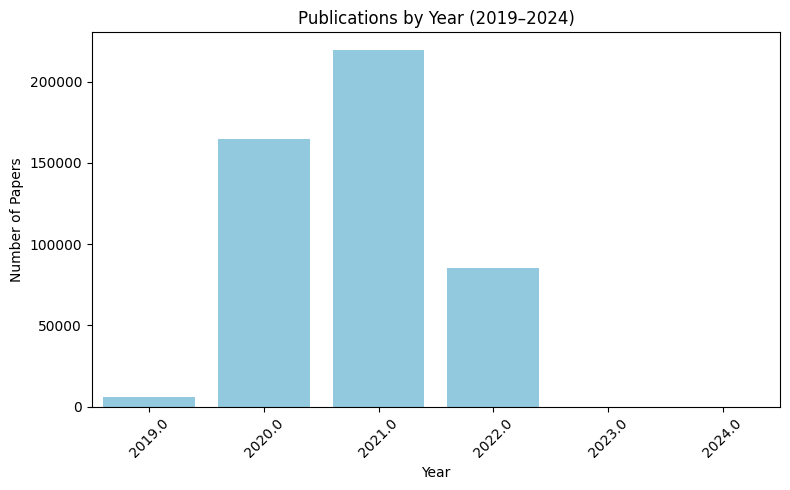

In [14]:
year_counts = (
    df_clean['year']
    .value_counts()
    .sort_index()
)

# Filter for years 2019–2024
mask = (year_counts.index >= 2019) & (year_counts.index <= 2024)
year_counts = year_counts[mask]

# Plot and save figure
plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values, color='skyblue')
plt.title('Publications by Year (2019–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("publications_by_year.jpg", dpi=300)  # Save to root directory
plt.show()

## b) Top Journals

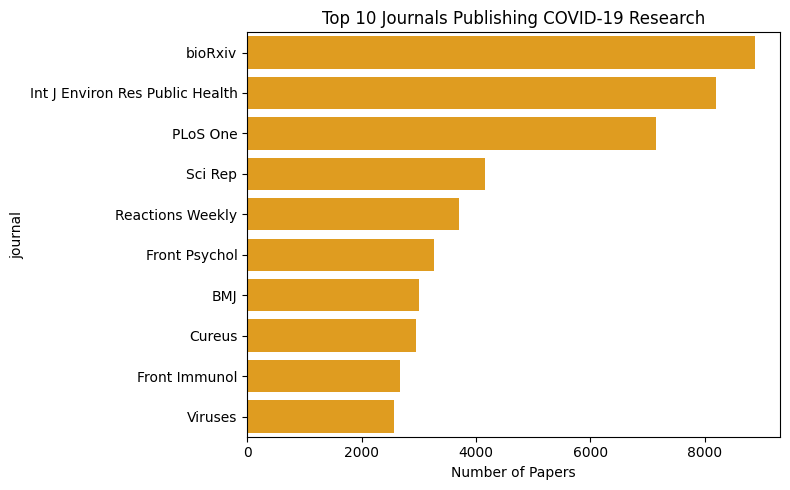

In [18]:
top_journals = (
    df_clean['journal']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(y=top_journals.index, x=top_journals.values, color='orange')
plt.title('Top 10 Journals Publishing COVID-19 Research')
plt.xlabel('Number of Papers')
plt.tight_layout()

# ✅ Save before showing
plt.savefig('Top_10_Journals_Publishing_COVID19_Research.jpg', dpi=300)

plt.show()


## c) Word cloud of paper titles

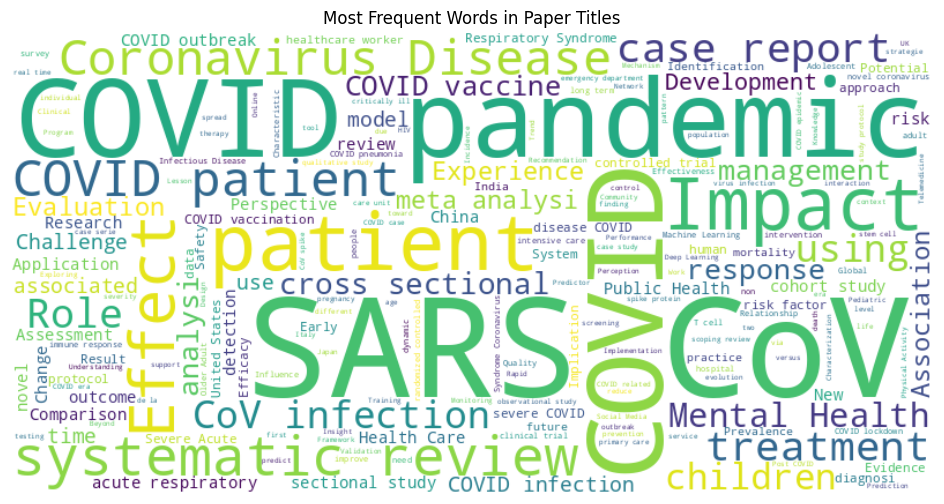

In [19]:
from wordcloud import WordCloud

titles = ' '.join(df_clean['title'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(titles)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Paper Titles')

plt.savefig('Most Frequent Words.jpg',dpi=300)
plt.show()